In [1]:
! eups list -s lsst_distrib

   21.0.0-2-g8e5b5ee+983633da53 	w_latest w_2021_16 current setup


Ran this command on a terminal which was set up to refer local version of mixcoatl
export PYTHONPATH="/gpfs/slac/lsst/fs1/g/data/youtsumi/Spot/mixcoatl/python":${PYTHONPATH}
```
pipetask run \
    -b /sdf/group/lsst/camera/IandT/repo_gen3/spot_test \
    -i LSSTCam/raw/all,LSSTCam/calib,/calib/run_12781 \
    -d "instrument='LSSTCam' AND detector=29 AND exposure.observation_type='spot' AND exposure.science_program IN ('12788') AND exposure.seq_num=1820" \
    -o u/youtsumi/spot/20210504a \
    -p /u/ki/youtsumi/gpfs/Spot/cpSpot2.yaml \
    --register-dataset-types
```

The mixcoatl version I used was
https://github.com/youtsumi/mixcoatl/tree/u/youtsumi/ButlerizeGridFitTask

In [2]:
from lsst.daf.butler import Butler
%matplotlib inline

import pylab as plt
# Stack imports
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

import numpy
repo_path = "/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/butler.yaml"
butler = Butler(repo_path)
registry = butler.registry
for c in registry.queryCollections():
    print(c)    

LSSTCam/raw/all
u/echarles/calib/run_12781
u/echarles/calib/run_12781/20210322T182107Z
/calib/run_12781
u/echarles/calib/bias/run_12781
u/echarles/calib/bias/run_12781/20210322T183606Z
LSSTCam/calib
LSSTCam/calib/unbounded
u/echarles/calib/run_12783/dark
u/echarles/calib/run_12783/dark/20210322T202029Z
u/echarles/calib/defects/run_12781
u/echarles/calib/defects/run_12781/20210322T224240Z
u/echarles/sandbox/eo_bias
u/echarles/sandbox/eo_bias/20210324T033754Z
u/echarles/calib/bias/run_12781/20210324T162502Z
u/echarles/calib/run_12783/dark/20210324T163856Z
u/echarles/calib/defects/run_12781/20210324T164529Z
u/youtsumi/spot/20210324
u/youtsumi/spot/20210324/20210325T013830Z
u/youtsumi/spot/20210324a
u/youtsumi/spot/20210324a/20210325T034308Z
u/youtsumi/spot/20210324c
u/youtsumi/spot/20210324c/20210325T041707Z
u/echarles/calib/bias/run_12781/20210326T180033Z
u/youtsumi/spot/20210402a
u/youtsumi/spot/20210402a/20210402T185535Z
u/youtsumi/spot/20210402b
u/youtsumi/spot/20210402b/20210402T1900

In [3]:
collections = 'u/youtsumi/spot/20210504a'
#collections = 'u/echarles/calib/bias/run_12781/20210326T180033Z'
subbutler = Butler(repo_path,collections=collections)
subregistry = subbutler.registry
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,collections=collections))        
        print(len(datasetRefs), dtype )
    except:
        print("Error", dtype )

79124 DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpBiasProc_full', {band, instrument, detector, physical_filter, exposure}, Exposure)
1 DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
Error DatasetType('bias_full', {instrument, detector}, ExposureF, isCalibration=True)
0 DatasetType('cpCombine_metadata', {instrument, detector}, PropertySet)
1 DatasetType('isr_config', {}, Config)
0 DatasetType('cpCombine_config', {}, Config)
1 DatasetType('packages', {}, Packages)
0 DatasetType('cpBiasProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
Error DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
0 DatasetType('cpDarkIsr', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpDarkProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpDark_metadata', {band, instrument, detect

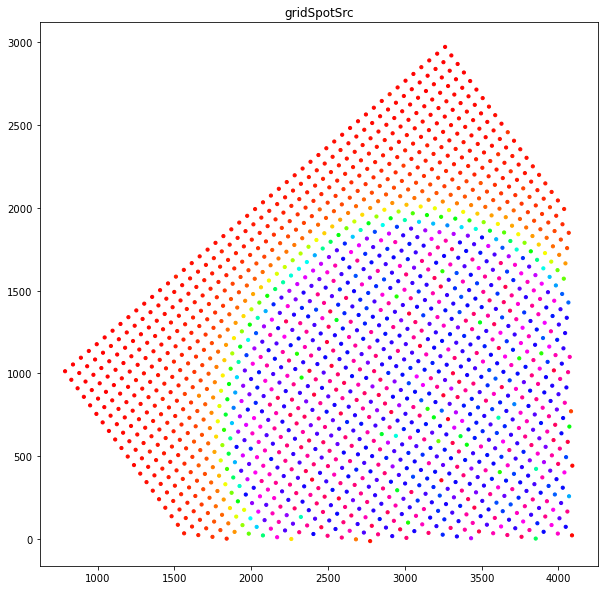

In [4]:
for atyp in ["gridSpotSrc"]:
    datasetRefs = list(subregistry.queryDatasets(datasetType=atyp,collections=collections))        
    datasetRefs[0].dataId
    src = subbutler.get(datasetRefs[0])
    x = src["spotgrid_x"]
    y = src["spotgrid_y"]
    I = src["base_GaussianFlux_instFlux"]
    fig = plt.figure(figsize=(10,10))
    plt.title(atyp)
    plt.scatter( x, y, c=(I/numpy.nanmax(I)), s=10,cmap='hsv' )